## Data Set Information:

* The dataset was downloaded from the UCI Machine Learning Repository.

* The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

* These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

* Two datasets were combined and few values were randomly removed.

### Attribute Information:

* For more information, read [Cortez et al., 2009]. 
    - Input variables (based on physicochemical tests): 
       - 1 - fixed acidity 
       - 2 - volatile acidity 
       - 3 - citric acid 
       - 4 - residual sugar 
       - 5 - chlorides 
       - 6 - free sulfur dioxide 
       - 7 - total sulfur dioxide 
       - 8 - density 
       - 9 - pH 
       - 10 - sulphates 
       - 11 - alcohol Output variable (based on sensory data): 
       - 12 - quality (score between 0 and 10)
        
### It's a classification problem i will try to 'Predict White Wine Quality'        

In [19]:
# Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [20]:
# Load the dataset

df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
df_white = df[df['type'] == 'white']


In [22]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
type                    4898 non-null object
fixed acidity           4890 non-null float64
volatile acidity        4891 non-null float64
citric acid             4896 non-null float64
residual sugar          4896 non-null float64
chlorides               4896 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4891 non-null float64
sulphates               4896 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


In [23]:
df.shape

(6497, 13)

In [24]:
df_white.shape

(4898, 13)

In [25]:
df_white.isna().sum()

type                    0
fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
quality                 0
dtype: int64

# Drop missing values


In [26]:
df_white.dropna(inplace=True)

/home/marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
# Display a description of the dataset

df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,6.855123,0.278071,0.334199,6.394343,0.045771,35.317146,138.340144,0.994026,3.188154,0.489700,10.516772,5.878029
std,0.843444,0.100528,0.120915,5.070853,0.021846,17.012967,42.490515,0.002993,0.150902,0.114196,1.231251,0.885699
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993735,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [28]:
df_white['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [29]:
print(len(df_white[df_white['quality'] == 3]))
print(len(df_white[df_white['quality'] == 4]))
print(len(df_white[df_white['quality'] == 5]))
print(len(df_white[df_white['quality'] == 6]))
print(len(df_white[df_white['quality'] == 7]))
print(len(df_white[df_white['quality'] == 8]))
print(len(df_white[df_white['quality'] == 9]))

20
162
1448
2186
875
174
5


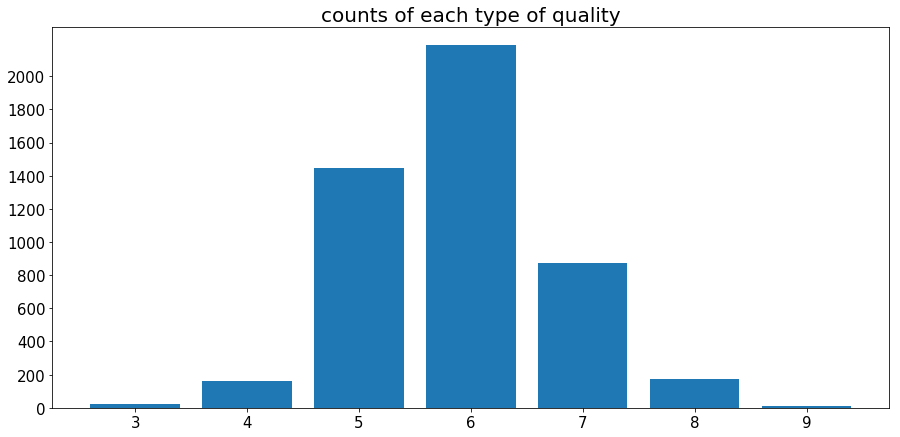

In [31]:
plt.figure(figsize=(15,7))

plt.bar(np.arange(7), [20
,162
,1448
,2186
,875
,174
,9])
plt.xticks(np.arange(7) , ('3', '4', '5', '6', '7', '8', '9'),fontsize=15)
plt.yticks(np.arange(0, 2200, 200),fontsize=15)
plt.title('counts of each type of quality',fontsize=20)

plt.show()

* The highest 3 values 5,6,7

## Convert **"quality"** from 6 unique values to 2 values: 
* 3,4,5,9 the worst quality.
* 6,7,8 the best quality.

In [32]:
df_white['quality']=df_white['quality'].replace([3,4,5,9],0)
df_white['quality']=df_white['quality'].replace([6,7,8],1)

/home/marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
df_white['quality'].value_counts()

1    3235
0    1635
Name: quality, dtype: int64

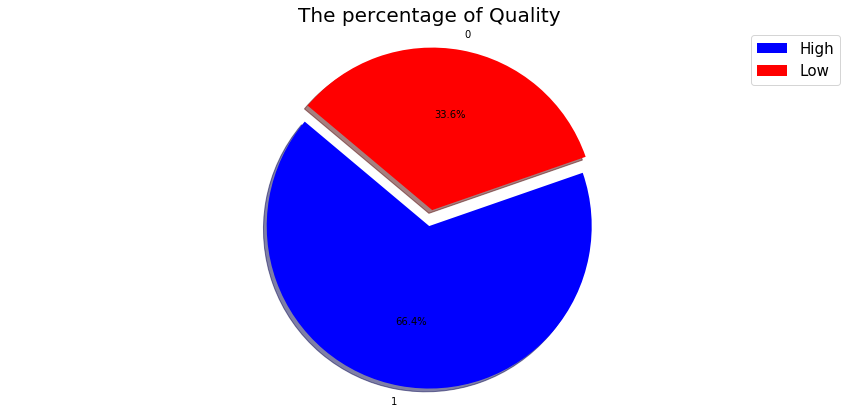

In [38]:
plt.figure(figsize=(15,7))
 
# Data to plot
labels = '1','0' 
sizes = [3235,1635]
colors = ['blue','red']
explode = (0.1, 0 )  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('The percentage of Quality',fontsize=20)
plt.legend(('High','Low'),fontsize=15)
plt.axis('equal')
plt.show()

## Visualize Feature Distributions
### Correlation between features

/home/marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.
/home/marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


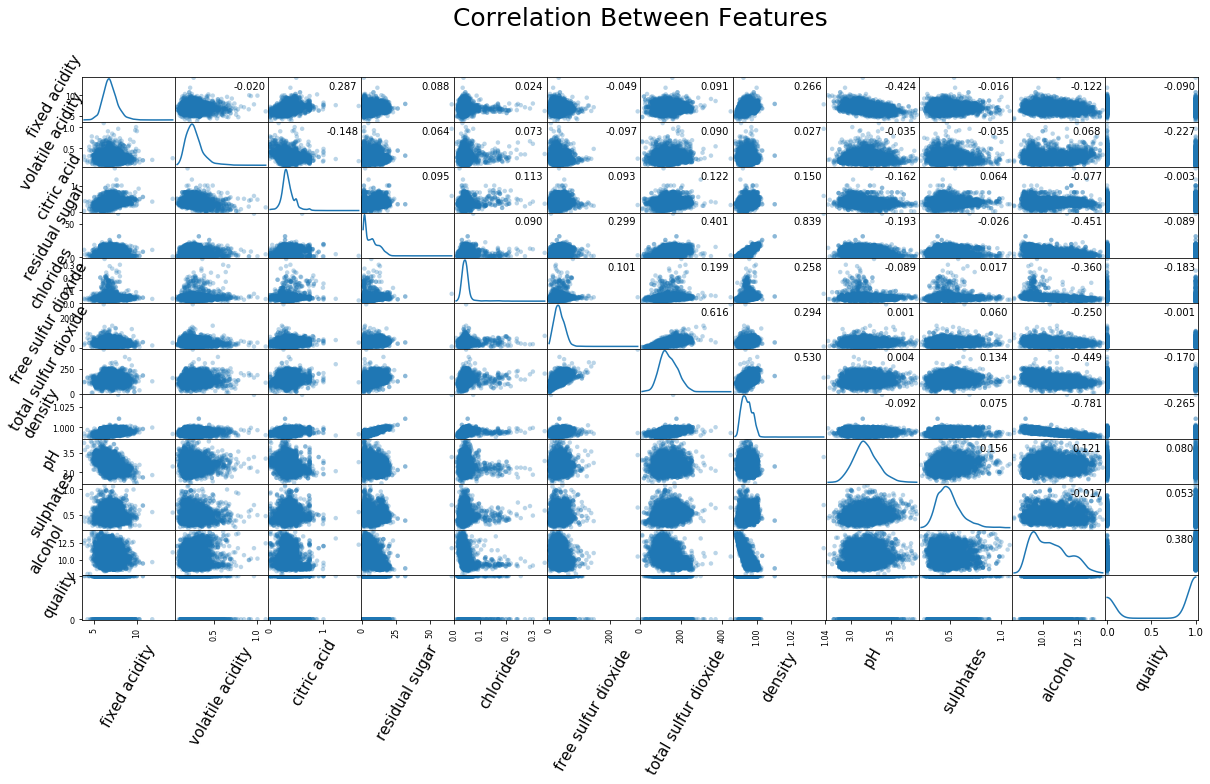

In [39]:
axes = pd.scatter_matrix(df_white, alpha = 0.3, figsize = (20,10), diagonal = 'kde' ,s=80)
corr = df_white.corr().as_matrix()
plt.title('Correlation Between Features',x=-5,y=13,fontsize=25)
# to change fontsize 
plt.xticks(fontsize =10,rotation =0)
plt.yticks(fontsize =10)
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(),fontsize = 15, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(),fontsize = 15, rotation = 60)
# put the correlation between each pair of variables on each graph
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i, j], (0.8, 0.8), xycoords="axes fraction", ha="center", va="center")
        

In [40]:
df_white['quality'].unique()

array([1, 0])

In [41]:
corr=df_white.corr()

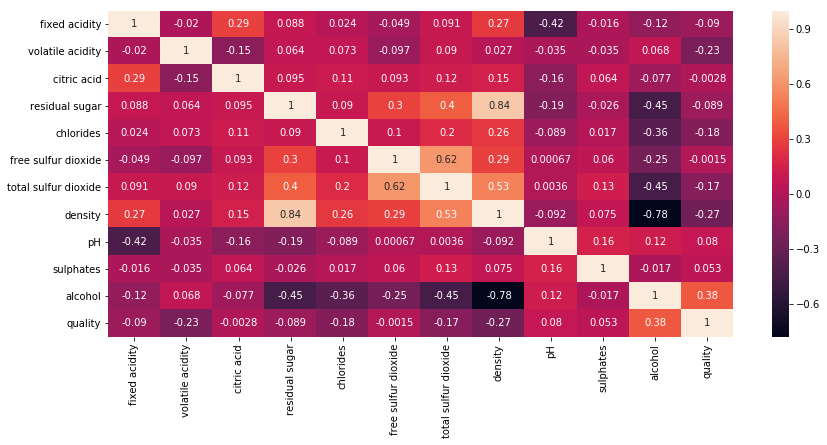

In [42]:
plt.figure(figsize=(14,6))
sns.heatmap(corr,annot=True)

* i choose 'alcohol' because it has 0.38 corrolation with quality 
* and 'pH' because it has 0.8 corrolation with quality

# split data

In [43]:
X = df_white[['alcohol', 'pH']]
y = df_white['quality']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [46]:
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_reg = LogisticRegression()

In [49]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
y_pred = log_reg.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6927860696517413

In [52]:
print('Accuracy = ',round(accuracy_score(y_test,y_pred),4) *100, '%')

Accuracy =  69.28 %


In [53]:
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
from sklearn.metrics import confusion_matrix

cm_log_reg = confusion_matrix(y_test, y_pred)
print(cm_log_reg)

[[204 360]
 [134 910]]


* Miss classified from confusion_matrix = 494

# Visualising the Training set results for Logistic Regression

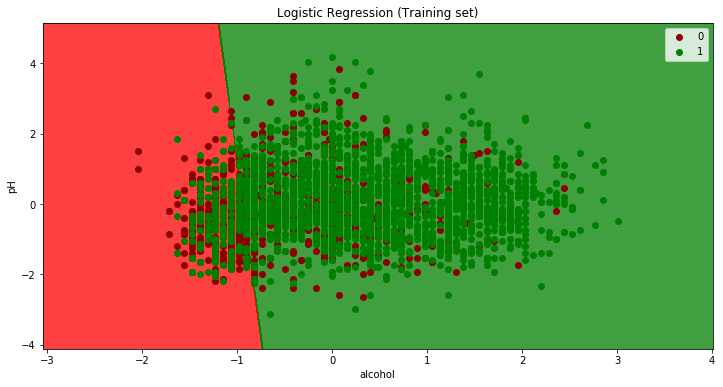

In [56]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')

plt.xlabel('alcohol')

plt.ylabel('pH')

plt.legend()

plt.show()

In [59]:
X_set.shape

(1608, 2)

# Visualising the Test set results for Logistic Regression

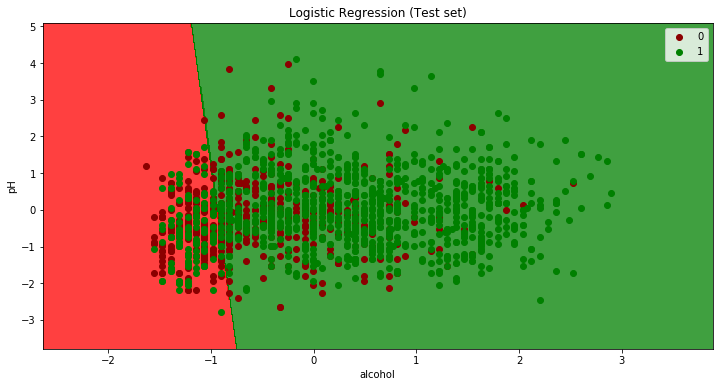

In [57]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('Logistic Regression (Test set)')

plt.xlabel('alcohol')

plt.ylabel('pH')


plt.legend()

plt.show()

In [58]:
X_set.shape

(1608, 2)

# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)

In [63]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [64]:
knn_pred=knn.predict(X_test)


In [65]:
print('Accuracy = ',round(accuracy_score(y_test,knn_pred),4) *100, '%')

Accuracy =  71.02000000000001 %


In [66]:
import sklearn.metrics as metrics
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print ('k = ',k,'-> accuracy : ',accuracy)

k =  1 -> accuracy :  0.7058457711442786
k =  2 -> accuracy :  0.6691542288557214
k =  3 -> accuracy :  0.7064676616915423
k =  4 -> accuracy :  0.6902985074626866
k =  5 -> accuracy :  0.7101990049751243
k =  6 -> accuracy :  0.7033582089552238
k =  7 -> accuracy :  0.7151741293532339
k =  8 -> accuracy :  0.710820895522388
k =  9 -> accuracy :  0.7046019900497512
k =  10 -> accuracy :  0.7077114427860697
k =  11 -> accuracy :  0.7064676616915423
k =  12 -> accuracy :  0.7095771144278606
k =  13 -> accuracy :  0.6977611940298507
k =  14 -> accuracy :  0.7126865671641791
k =  15 -> accuracy :  0.7021144278606966
k =  16 -> accuracy :  0.7046019900497512
k =  17 -> accuracy :  0.697139303482587
k =  18 -> accuracy :  0.707089552238806
k =  19 -> accuracy :  0.6977611940298507
k =  20 -> accuracy :  0.6983830845771144
k =  21 -> accuracy :  0.695273631840796
k =  22 -> accuracy :  0.707089552238806
k =  23 -> accuracy :  0.697139303482587
k =  24 -> accuracy :  0.7021144278606966
k =  25

In [67]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')


7  :  71.52 %


In [68]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

In [69]:
print('Accuracy = ',round(accuracy_score(y_test,knn_pred),3) *100, '%')

Accuracy =  71.5 %


In [70]:
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, knn_pred)
print(cm_knn)

[[250 314]
 [144 900]]


* Miss classified from confusion_matrix = 458

# Visualising the Training set results for KNN

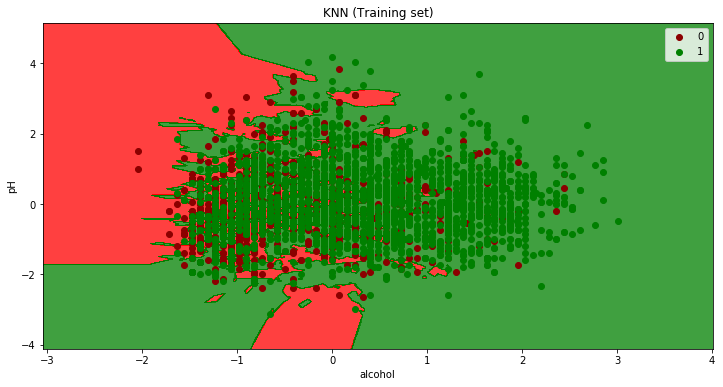

In [71]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('KNN (Training set)')

plt.xlabel('alcohol')

plt.ylabel('pH')

plt.legend()

plt.show()

In [72]:
X_set.shape

(3262, 2)

# Visualising the Test set results for KNN

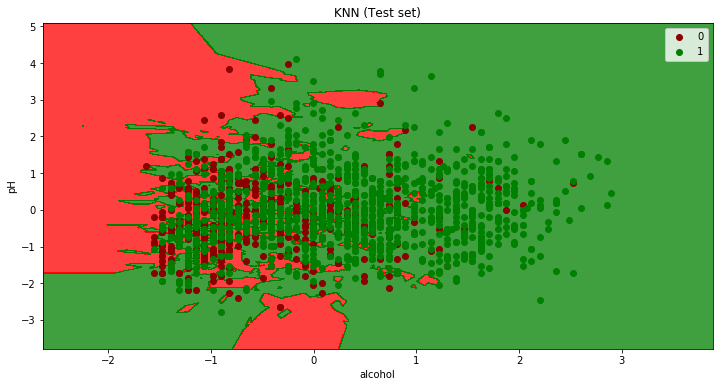

In [73]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('KNN (Test set)')

plt.xlabel('alcohol')

plt.ylabel('pH')

plt.legend()

plt.show()

In [74]:
X_set.shape

(1608, 2)

In [75]:
train_accuracy=np.empty(len(range(1,100)))
test_accuracy=np.empty(len(range(1,100)))
for i, k in enumerate(range(1,100)):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
     #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

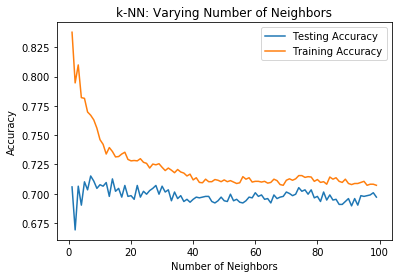

In [76]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(range(1,100), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,100), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# SVM

In [77]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear').fit(X_train,y_train)
svm_pred=svm_linear.predict(X_test)
print('Accuracy = ',round(accuracy_score(y_test,svm_pred),4) *100, '%')

Accuracy =  64.92999999999999 %


In [78]:
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
cm_svm_lin = confusion_matrix(y_test, svm_pred)
print(cm_svm_lin)

[[   0  564]
 [   0 1044]]


* Miss classified from confusion_matrix = 564

In [79]:
svm_poly=SVC(kernel='poly').fit(X_train,y_train)
svm_polr_pred=svm_poly.predict(X_test)
print('Accuracy = ',round(accuracy_score(y_test,svm_polr_pred),4) *100, '%')

Accuracy =  64.92999999999999 %


In [80]:
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
cm_svm_polr = confusion_matrix(y_test, svm_polr_pred)
print(cm_svm_polr)

[[   0  564]
 [   0 1044]]


* Miss classified from confusion_matrix = 564

In [81]:
svm_rbf=SVC(kernel='rbf').fit(X_train,y_train)
svm_rbf_pred=svm_rbf.predict(X_test)

print('Accuracy = ',round(accuracy_score(y_test,svm_rbf_pred),4) *100, '%')

Accuracy =  70.15 %


In [82]:
# Making the Confusion Matrix will contain the correct and incorrect prediction on the dataset.
cm_svm_rbf = confusion_matrix(y_test, svm_rbf_pred)
print(cm_svm_rbf)

[[220 344]
 [136 908]]


* Miss classified from confusion_matrix = 480

# Visualising the Training set results for SVM_Linear

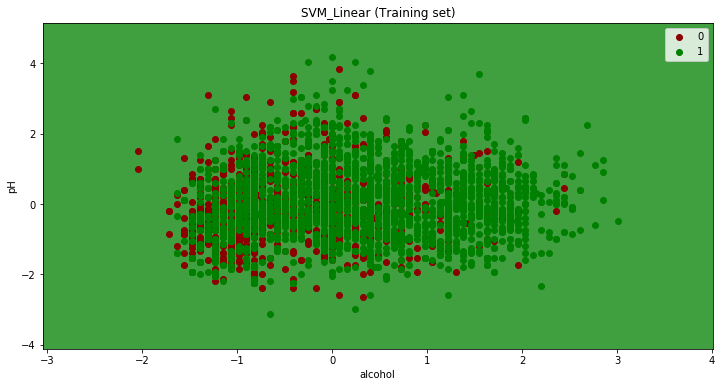

In [83]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('SVM_Linear (Training set)')

plt.xlabel('alcohol')

plt.ylabel('pH')


plt.legend()

plt.show()

In [84]:
X_set.shape

(3262, 2)

# Visualising the Test set results for SVM_Linear

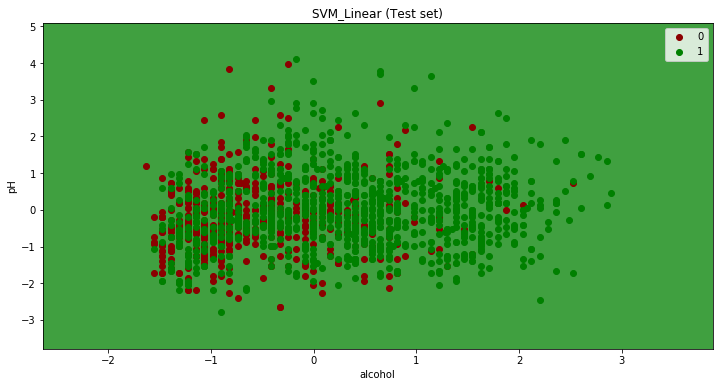

In [85]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('SVM_Linear (Test set)')

plt.xlabel('alcohol')

plt.ylabel('pH')


plt.legend()

plt.show()

In [86]:
X_set.shape

(1608, 2)

# Visualising the Training set results for SVM_poly

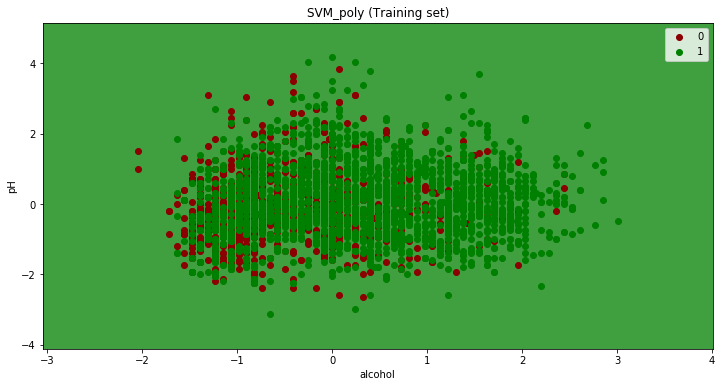

In [87]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_poly.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('SVM_poly (Training set)')

plt.xlabel('alcohol')

plt.ylabel('pH')


plt.legend()

plt.show()

In [88]:
X_set.shape

(3262, 2)

# Visualising the Test set results for SVM_poly

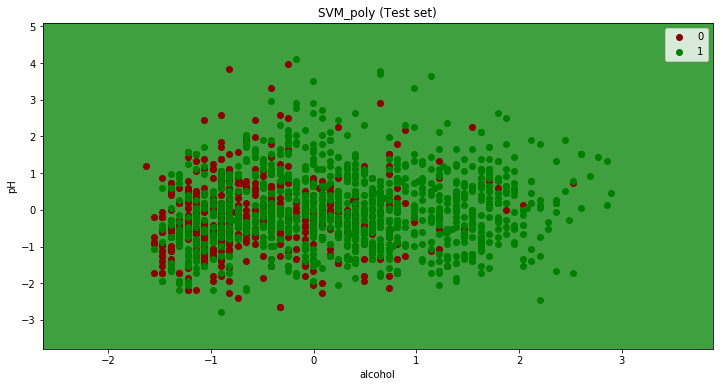

In [89]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_poly.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('SVM_poly (Test set)')

plt.xlabel('alcohol')

plt.ylabel('pH')


plt.legend()

plt.show()

In [90]:
X_set.shape

(1608, 2)

# Visualising the Training set results for SVM_rbf (default)

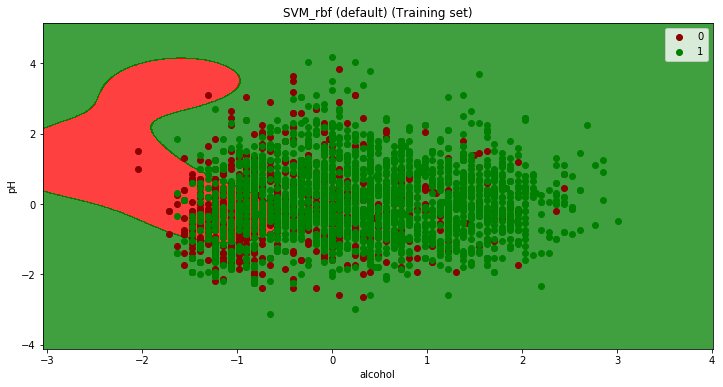

In [91]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('SVM_rbf (default) (Training set)')

plt.xlabel('alcohol')

plt.ylabel('pH')


plt.legend()

plt.show()

In [92]:
X_set.shape

(3262, 2)

# Visualising the Test set results for SVM_rbf (default)

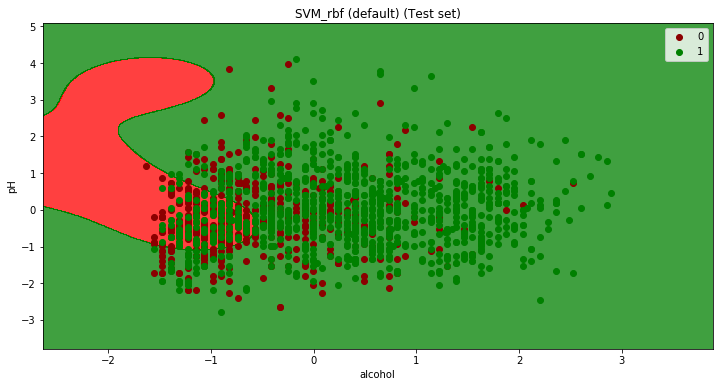

In [93]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('SVM_rbf (default) (Test set)')

plt.xlabel('alcohol')

plt.ylabel('pH')


plt.legend()

plt.show()

In [94]:
X_set.shape

(1608, 2)

# Naive bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB().fit(X_train,y_train)
nb_pred=nb.predict(X_test)
print('Accuracy = ',round(accuracy_score(y_test,nb_pred),4) *100, '%')


Accuracy =  71.21 %


In [96]:
confusion_matrix(y_test,nb_pred)

array([[301, 263],
       [200, 844]])


* Miss classified from confusion_matrix = 463

# Visualising the Training set results for Naive bayes

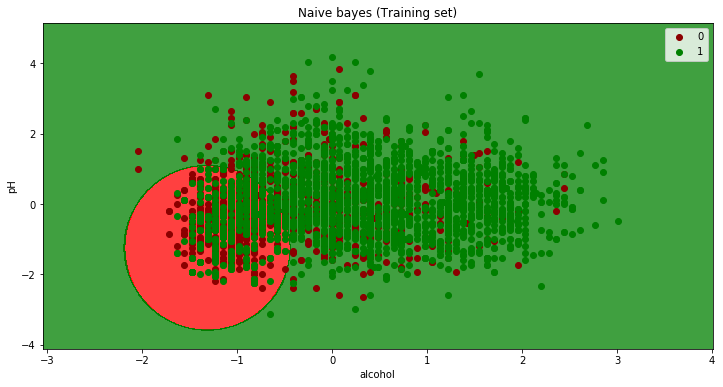

In [97]:

from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)

plt.title('Naive bayes (Training set)')

plt.xlabel('alcohol')

plt.ylabel('pH')


plt.legend()

plt.show()

# Visualising the Test set results for Naive bayes

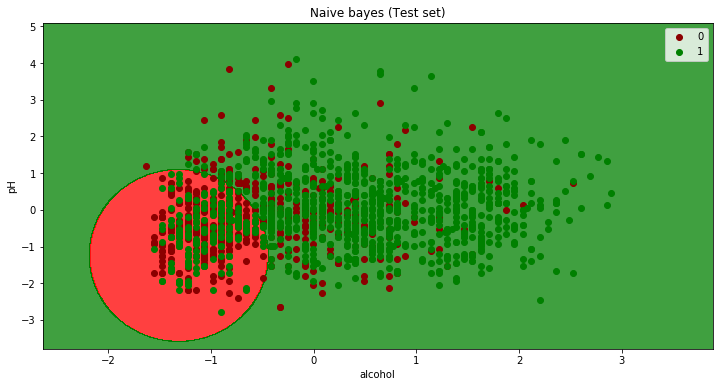

In [98]:


from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('darkred', 'green'))(i), label = j)


plt.title('Naive bayes (Test set)')

plt.xlabel('alcohol')

plt.ylabel('pH')


plt.legend()

plt.show()

In [99]:
X_set.shape

(1608, 2)

# The best accuracy 71.52 % when i used KNN